In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [102]:
ques_df = pd.read_csv('corrected_data.csv')

In [103]:
ques_df.head()
result = ques_df.columns
print(result)

Index(['index', 'subjectID', 'AES_1', 'AES_16', 'AES_17', 'AES_18', 'AES_2',
       'AES_7', 'AES_8', 'BIS_13',
       ...
       'WBSI__5', 'WBSI__6', 'WBSI__7', 'WBSI__8', 'WBSI__9', 'age', 'gender',
       'proportion_attention_check_failed', 'proportion_inattentive_incorrect',
       'study'],
      dtype='object', length=225)


In [104]:
ques_df = ques_df.drop(['index','subjectID'],axis=1)

In [105]:
clean_df = ques_df.dropna(axis = 'columns')

In [106]:
clean_df.head()
result = ques_df.columns
print(result)

Index(['AES_1', 'AES_16', 'AES_17', 'AES_18', 'AES_2', 'AES_7', 'AES_8',
       'BIS_13', 'BIS_14', 'BIS_17',
       ...
       'WBSI__5', 'WBSI__6', 'WBSI__7', 'WBSI__8', 'WBSI__9', 'age', 'gender',
       'proportion_attention_check_failed', 'proportion_inattentive_incorrect',
       'study'],
      dtype='object', length=223)


In [107]:
clean_df = clean_df.loc[(clean_df['proportion_attention_check_failed'] <0.1) & (clean_df['proportion_inattentive_incorrect'] <0.1)]

In [108]:
clean_df

,CQ__1,CQ__10,CQ__11,CQ__12,CQ__13,CQ__14,CQ__15,CQ__16,CQ__17,CQ__18,...,WBSI__5,WBSI__6,WBSI__7,WBSI__8,WBSI__9,age,gender,proportion_attention_check_failed,proportion_inattentive_incorrect,study
0,1,1,2,1,3,1,1,2,2,3,...,3,3,3,1,3,57,0,0.0,0.0,1
1,1,1,3,2,0,1,3,1,1,0,...,1,1,1,1,1,53,1,0.0,0.0,1
2,2,1,1,0,1,1,0,1,1,1,...,1,2,1,2,2,42,0,0.0,0.0,1
3,2,1,1,0,1,1,1,1,0,0,...,2,3,3,3,2,59,1,0.0,0.0,1
4,4,1,1,2,2,2,2,0,2,1,...,0,1,0,2,0,57,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2,1,1,0,1,1,0,0,1,1,...,0,0,0,2,1,46,1,0.0,0.0,2
1208,2,0,0,0,1,2,2,0,1,1,...,2,3,3,3,2,63,1,0.0,0.0,2
1209,3,3,0,0,0,0,0,0,0,2,...,3,3,4,3,3,27,1,0.0,0.0,2
1210,2,0,1,0,1,1,2,1,1,0,...,3,2,1,2,2,35,1,0.0,0.0,2


In [109]:
final_df = clean_df.drop(['proportion_attention_check_failed','proportion_inattentive_incorrect','study', 'age'],axis=1)

In [110]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(final_df)
print(chi_square_value, p_value)

#KMO
#Value should be bigger than 0.6
kmo_all,kmo_model=calculate_kmo(final_df)
print(kmo_model)

111868.22496668756 0.0
0.9833772602864881


/Users/ijisoo/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [111]:
# Producing correlation matrix
cor_matrix = final_df.corr().abs()
print(); print(cor_matrix)

# Selecting upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
print(); print(upper_tri)

# Finding index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(); print(to_drop)

# Dropping Marked Features
corr_df = final_df.drop(columns=to_drop, axis=1)
print(); print(corr_df.head())


            CQ__1    CQ__10    CQ__11    CQ__12    CQ__13    CQ__14    CQ__15  \
CQ__1    1.000000  0.492512  0.332265  0.293978  0.386794  0.429723  0.294205   
CQ__10   0.492512  1.000000  0.473516  0.469804  0.535833  0.617735  0.436167   
CQ__11   0.332265  0.473516  1.000000  0.598377  0.453621  0.448321  0.518510   
CQ__12   0.293978  0.469804  0.598377  1.000000  0.435434  0.493438  0.394493   
CQ__13   0.386794  0.535833  0.453621  0.435434  1.000000  0.569802  0.512424   
...           ...       ...       ...       ...       ...       ...       ...   
WBSI__6  0.355794  0.525338  0.341771  0.329085  0.426877  0.465069  0.328855   
WBSI__7  0.297367  0.465596  0.326787  0.285857  0.396512  0.420385  0.305157   
WBSI__8  0.101214  0.110068  0.047448  0.062907  0.078375  0.026584  0.074848   
WBSI__9  0.332072  0.508796  0.319051  0.309858  0.381514  0.437707  0.289664   
gender   0.196851  0.121674  0.099302  0.091002  0.166298  0.054623  0.196455   

           CQ__16    CQ__1

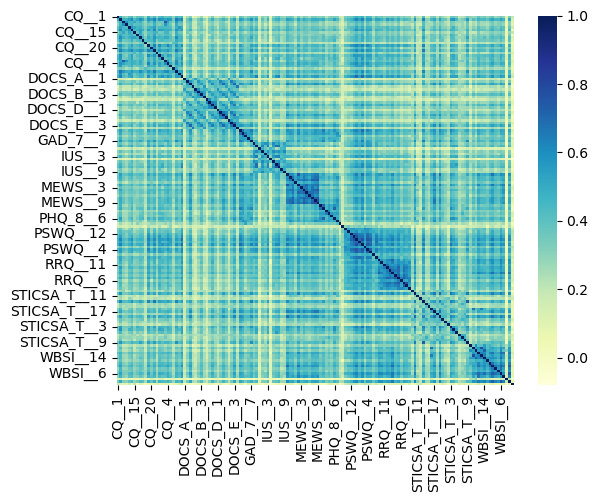

In [112]:
import matplotlib.pyplot as mp
import seaborn as sb
# plotting correlation heatmap 
dataplot=sb.heatmap(corr_df.corr(),cmap="YlGnBu") 
  
# displaying heatmap 
mp.show()

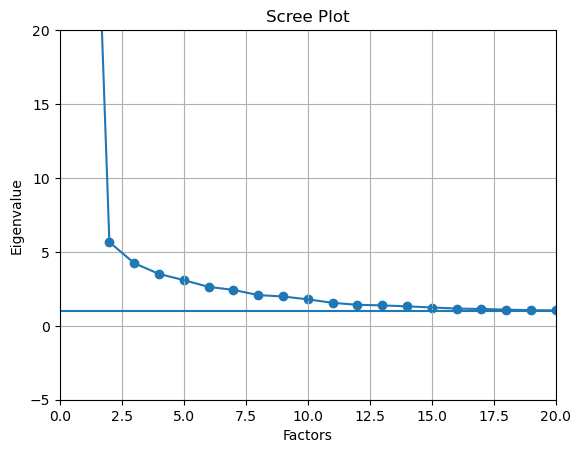

In [116]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(rotation='oblimin')
fa.fit(corr_df)

#GET EIGENVALUES
ev, v = fa.get_eigenvalues()
ev

plt.scatter(range(1,corr_df.shape[1]+1),ev)
plt.plot(range(1,corr_df.shape[1]+1),ev)
plt.axhline(1)
plt.xlim(0, 20)
plt.ylim(-5, 20)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()